In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


# data importing

In [755]:
titanic=pd.read_csv('train.csv')
testing=pd.read_csv('test.csv')
testing_ids=testing['PassengerId']
titanic.tail()
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [756]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [757]:
titanic.describe().round(1)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


# Data Cleaning pre-processing

<Axes: >

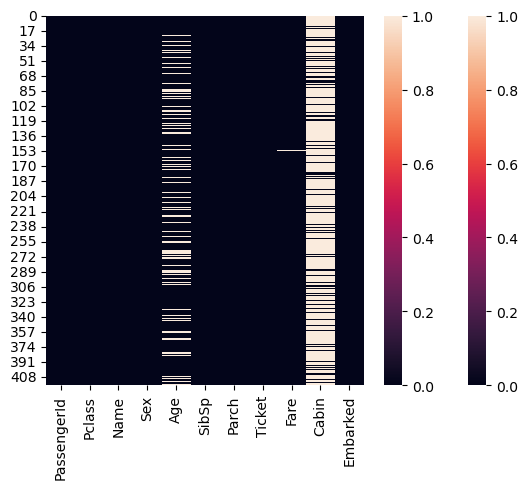

In [758]:
sb.heatmap(titanic.isna())
sb.heatmap(testing.isna())

In [759]:
#itanic['Age'].isna().sum()
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
testing['Age']=titanic['Age'].fillna(testing['Age'].mean())
titanic.info()
testing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [760]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


# converting categorical feature 

In [761]:
#titanic['Sex'].value_counts()
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q


In [762]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex
titanic['sex']=sex

In [763]:
sex=pd.get_dummies(testing['Sex'],drop_first=True)
sex
testing['sex']=sex

In [764]:
embarked=pd.get_dummies(titanic['Embarked'])
embarked
titanic=pd.concat([titanic,embarked],axis=1)

In [765]:
embarked=pd.get_dummies(testing['Embarked'])
testing=pd.concat([testing,embarked],axis=1)

In [766]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,C,Q,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,NaN,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,NaN,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C,1,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,NaN,Q,1,0,1,0


In [767]:
testing.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex,C,Q,S
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,S,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,44.000000,0,0,PC 17758,108.9000,C105,C,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,29.699118,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,34.000000,0,0,359309,8.0500,NaN,S,1,0,0,1
417,1309,3,"Peter, Master. Michael J",male,18.000000,1,1,2668,22.3583,NaN,C,1,1,0,0


In [768]:
titanic.drop(columns=['Embarked','Sex','Cabin','Name','Ticket'],inplace=True)
testing.drop(columns=['Embarked','Sex','Cabin','Name','Ticket'],inplace=True)

In [769]:
titanic.drop(columns=['PassengerId'],inplace=True)
testing.drop(columns=['PassengerId'],inplace=True)


In [770]:
testing['Fare']=testing['Fare'].fillna(testing['Fare'].mean())
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   sex     418 non-null    uint8  
 6   C       418 non-null    uint8  
 7   Q       418 non-null    uint8  
 8   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 18.1 KB


# Exploratory Data (EDA)

<Axes: xlabel='Survived', ylabel='count'>

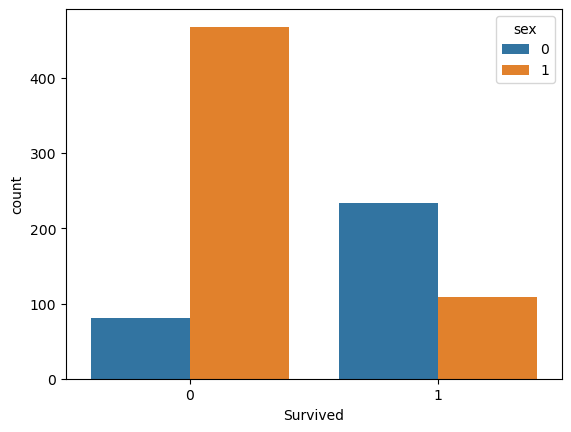

In [771]:
sb.countplot(x='Survived',data=titanic,hue='sex')

as we see more females are survived and we know why because all of us saw titanic movie .

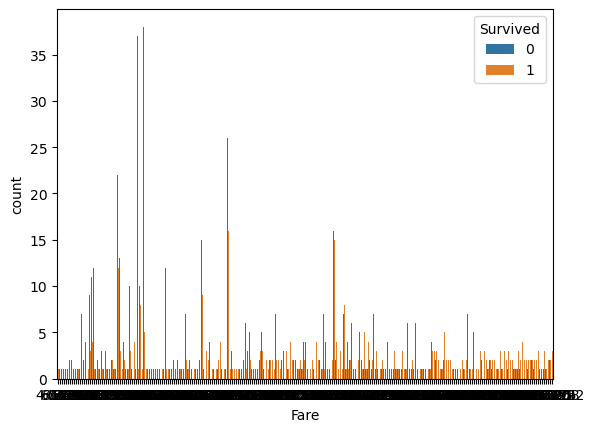

In [772]:
sb.countplot(x='Fare',data=titanic,hue='Survived');

also we can say that the people who paid alot of money they rided the boat first so they survived . 

In [773]:
titanic.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,C,Q,S
886,0,2,27.000000,0,0,13.00,1,0,0,1
887,1,1,19.000000,0,0,30.00,0,0,0,1
888,0,3,29.699118,1,2,23.45,0,0,0,1
889,1,1,26.000000,0,0,30.00,1,1,0,0
890,0,3,32.000000,0,0,7.75,1,0,1,0


In [774]:
testing.tail()

,Pclass,Age,SibSp,Parch,Fare,sex,C,Q,S
413,3,29.699118,0,0,8.0500,1,0,0,1
414,1,44.000000,0,0,108.9000,0,1,0,0
415,3,29.699118,0,0,7.2500,1,0,0,1
416,3,34.000000,0,0,8.0500,1,0,0,1
417,3,18.000000,1,1,22.3583,1,1,0,0


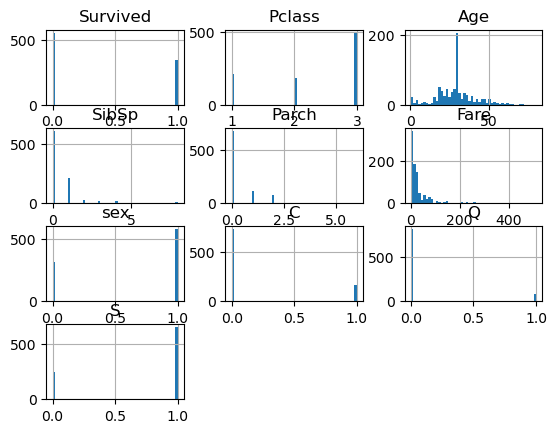

In [775]:
titanic.hist(bins=50);

# building model

In [776]:
y=titanic['Survived']

In [777]:
X=titanic.drop('Survived',axis=1)

In [778]:
#X_test=testing.drop('Survived',axis=1)

In [779]:
X

,Pclass,Age,SibSp,Parch,Fare,sex,C,Q,S
0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,26.000000,0,0,7.9250,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,1
4,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,0,1
887,1,19.000000,0,0,30.0000,0,0,0,1
888,3,29.699118,1,2,23.4500,0,0,0,1
889,1,26.000000,0,0,30.0000,1,1,0,0


In [780]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [781]:

from sklearn.model_selection import train_test_split

# model training and predicting 

In [782]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [783]:
X_test.shape

(179, 9)

In [784]:
from sklearn.linear_model import LogisticRegression
sub=LogisticRegression(max_iter=5000).fit(X_train,y_train)

In [785]:
sub=model.fit(X_train,y_train)



In [786]:
y_predict=sub.predict(X_test)

In [787]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

# model evaluation 

In [788]:
from sklearn.metrics import confusion_matrix 

In [789]:
confusion_matrix(y_test,y_predict)

array([[90, 15],
       [19, 55]], dtype=int64)

In [790]:
from sklearn.metrics import classification_report

In [791]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       105\n           1       0.79      0.74      0.76        74\n\n    accuracy                           0.81       179\n   macro avg       0.81      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n'

In [792]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8100558659217877

In [793]:
submissions=sub.predict(testing)

In [794]:
datas=pd.DataFrame({'PassengerId':testing_ids.values,'Survived':submissions})

In [795]:
datas.to_csv('submissions.csv',index=False)